In [129]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [130]:
# filepath=r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\SAVED_MODEL\models.pkl'

In [131]:
filepath=r'E:\College\2nd year\Winter project\Thyroid Performance Analysis\SAVED_MODEL\models.pkl'

In [132]:
with open(filepath, 'rb') as file:
    models = pickle.load(file)

In [133]:
# datasetfilepath=r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\Data\pre_data\Dataset.csv'

In [134]:
datasetfilepath=r'E:\College\2nd year\Winter project\Thyroid Performance Analysis\Data\pre_data\Dataset.csv'

In [135]:
Dataset = pd.read_csv(datasetfilepath)

In [136]:
Dataset = Dataset.drop('Unnamed: 0', axis=1) 

In [137]:
X = Dataset.drop('Target', axis=1)  

y = Dataset['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

def results(y_test, y_pred, print_scores=False):
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)



    if print_scores:
        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F1-Score: {f1 * 100:.2f}%")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("\n")


    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

In [139]:
models

dict_keys(['RandomForest', 'SVC', 'KNeighbors', 'GradientBoosting', 'XGBoost', 'BernoulliNB', 'DecisionTree'])

In [140]:
for model_name, model in models.items():
     
    y_pred = model.predict(X_test)
    print(model_name,":")
    results(y_test, y_pred, print_scores=True)

RandomForest :
Precision: 90.67%
Recall: 90.47%
F1-Score: 90.57%
Accuracy: 90.47%


SVC :
Precision: 90.10%
Recall: 94.92%
F1-Score: 92.45%
Accuracy: 94.92%


KNeighbors :
Precision: 90.94%
Recall: 93.88%
F1-Score: 92.24%
Accuracy: 93.88%


GradientBoosting :
Precision: 95.95%
Recall: 89.01%
F1-Score: 91.47%
Accuracy: 89.01%


XGBoost :
Precision: 91.99%
Recall: 91.66%
F1-Score: 91.82%
Accuracy: 91.66%


BernoulliNB :
Precision: 93.90%
Recall: 94.58%
F1-Score: 92.41%
Accuracy: 94.58%


DecisionTree :
Precision: 91.21%
Recall: 90.89%
F1-Score: 91.05%
Accuracy: 90.89%




In [142]:
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']
models = models.keys()

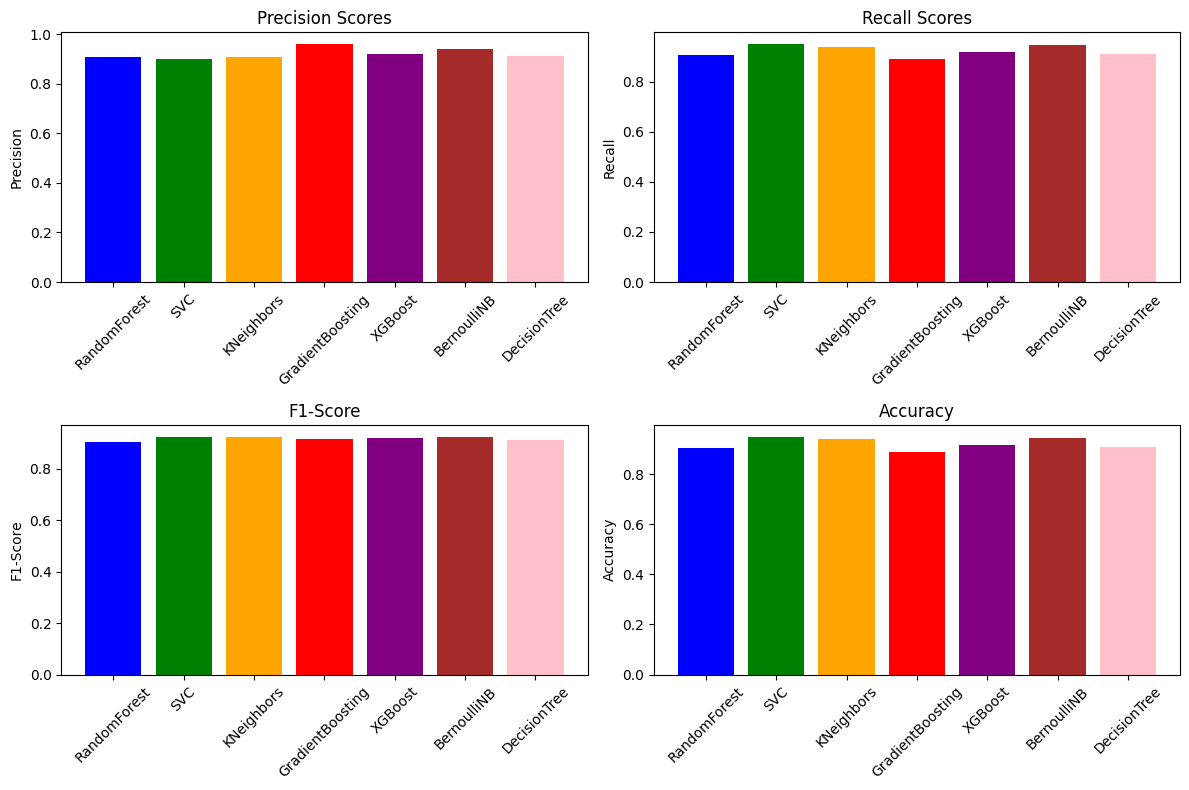

In [145]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].bar(models, precision_scores, color=colors)
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].tick_params(axis='x', rotation=45)  

axs[0, 1].bar(models, recall_scores, color=colors)
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].tick_params(axis='x', rotation=45)  

axs[1, 0].bar(models, f1_scores, color=colors)
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].tick_params(axis='x', rotation=45)  #

axs[1, 1].bar(models, accuracy_scores, color=colors)
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

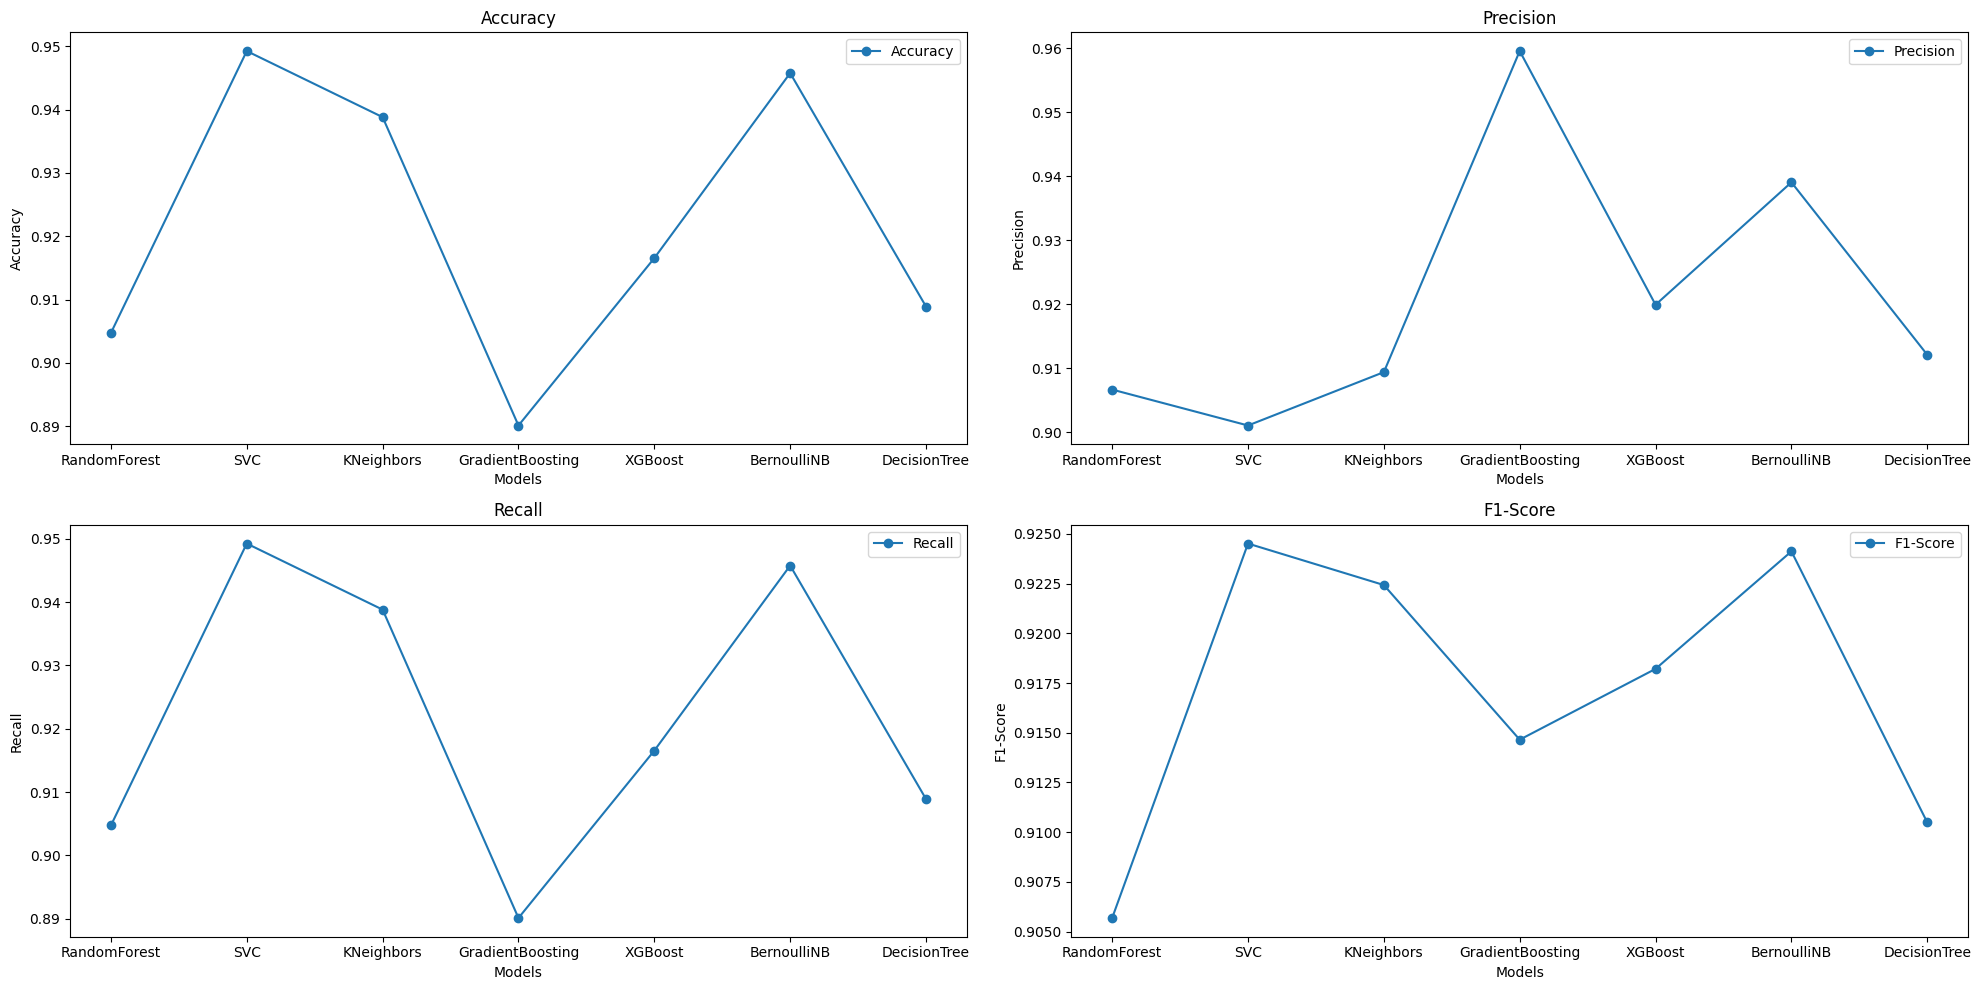

In [157]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

axes[0, 0].plot(models, accuracy_scores, label='Accuracy', marker='o')
axes[0, 0].set_xlabel("Models")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Accuracy")
axes[0, 0].legend()

axes[0, 1].plot(models, precision_scores, label='Precision', marker='o')
axes[0, 1].set_xlabel("Models")
axes[0, 1].set_ylabel("Precision")
axes[0, 1].set_title("Precision")
axes[0, 1].legend()

axes[1, 0].plot(models, recall_scores, label='Recall', marker='o')
axes[1, 0].set_xlabel("Models")
axes[1, 0].set_ylabel("Recall")
axes[1, 0].set_title("Recall")
axes[1, 0].legend()

axes[1, 1].plot(models, f1_scores, label='F1-Score', marker='o')
axes[1, 1].set_xlabel("Models")
axes[1, 1].set_ylabel("F1-Score")
axes[1, 1].set_title("F1-Score")
axes[1, 1].legend()

plt.tight_layout()

plt.show()

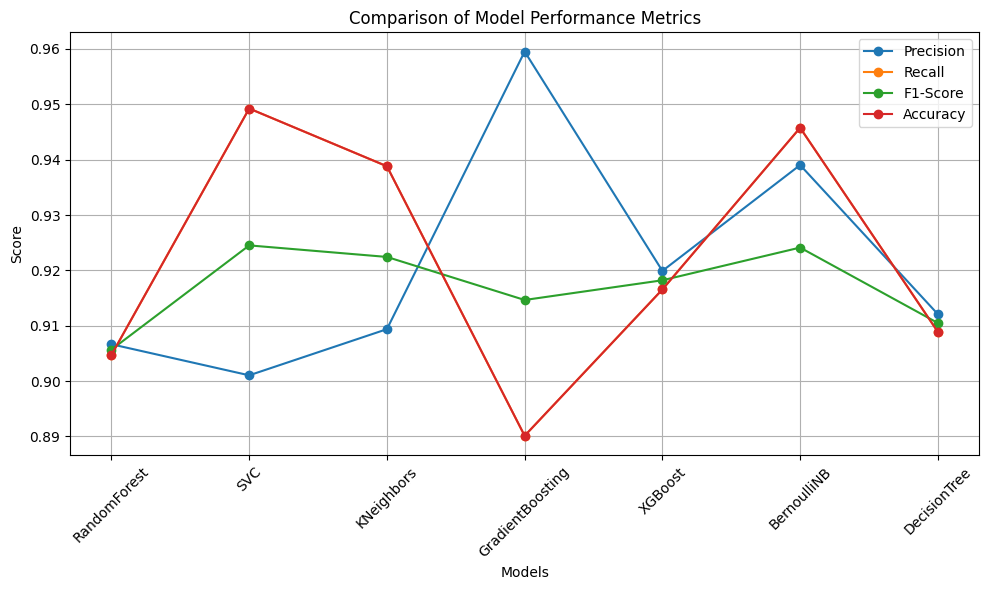

In [158]:
plt.figure(figsize=(10, 6))

plt.plot(models, precision_scores, label='Precision', marker='o')
plt.plot(models, recall_scores, label='Recall', marker='o')
plt.plot(models, f1_scores, label='F1-Score', marker='o')
plt.plot(models, accuracy_scores, label='Accuracy', marker='o')

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Comparison of Model Performance Metrics")

plt.legend()

plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()